<a href="https://colab.research.google.com/github/luizkrawiec/estatistics/blob/main/propabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidade**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

In [2]:
enem_sp = pd.read_csv('/content/enem_2019_tratado.csv', sep=',', encoding='ISO-8859-1')

In [3]:
enem_guarulhos = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Guarulhos']

In [4]:
enem_bauru = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Bauru']

In [5]:
enem_guarulhos.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
56,"1,90E+11",Guarulhos,17,F,1,parda,1,2,pública,NaN,...,468.1,Espanhol,1.0,100.0,60.0,60.0,100.0,0.0,320.0,Sim
69,"1,90E+11",Guarulhos,27,M,1,nao_declarado,1,1,não_respondeu,NaN,...,743.8,Inglês,1.0,120.0,180.0,120.0,120.0,160.0,700.0,Sim
130,"1,90E+11",Guarulhos,28,F,1,branca,1,1,não_respondeu,NaN,...,415.1,Inglês,1.0,160.0,120.0,160.0,120.0,100.0,660.0,Sim
202,"1,90E+11",Guarulhos,17,F,1,parda,1,2,pública,35005824.0,...,594.9,Inglês,1.0,120.0,120.0,120.0,120.0,160.0,640.0,Sim


In [6]:
enem_bauru.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
477,"1,90E+11",Bauru,21,M,1,branca,1,1,não_respondeu,NaN,...,664.1,Inglês,1.0,100.0,120.0,120.0,120.0,100.0,560.0,Sim
928,"1,90E+11",Bauru,17,M,1,amarela,1,2,pública,35025240.0,...,740.3,Inglês,1.0,140.0,120.0,120.0,140.0,100.0,620.0,Sim
1070,"1,90E+11",Bauru,19,M,1,branca,1,1,não_respondeu,NaN,...,789.2,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim
1235,"1,90E+11",Bauru,18,F,1,parda,1,2,privada,35115435.0,...,71.5,Inglês,1.0,140.0,140.0,140.0,140.0,120.0,680.0,Sim
1506,"1,90E+11",Bauru,19,M,1,branca,1,1,não_respondeu,NaN,...,533.8,Espanhol,1.0,120.0,140.0,120.0,100.0,140.0,620.0,Sim


In [7]:
len(enem_guarulhos)

15647

In [8]:
len(enem_bauru)

4171

In [9]:
len(enem_sp)

499940

In [10]:
def probab(A,E):
  resultado = (A/E)*100
  print('{:.2f}'.format(resultado))

In [11]:
#Probabilidade de retirar um vestibulando de guarulhos
probab(len(enem_guarulhos), len(enem_sp))

3.13


In [12]:
#Probabilidade de retirar um vestibulando de bauru
probab(len(enem_bauru), len(enem_sp))

0.83


# **Probalidade de não ocorrer um evento**

In [13]:
# criando função de probablidade de não ocorrer um evento
def probab_nao(A,E):
  resultado = (1 - (A/E))*100
  print('{:.2f}'.format(resultado))

In [14]:
#probabilidade de não retirar um vestibulando de guarulhos
probab_nao(len(enem_guarulhos), len(enem_sp))

96.87


In [15]:
#probabilidade de não retirar um vestibulando de bauru e nem de bauru
probab_nao(len(enem_bauru)+len(enem_guarulhos), len(enem_sp))

96.04


# **Probalidade da união mutamente exclusivos (AUB)**

In [16]:
#Criando função probabilidade da união mutuamente exclusivos
def probab_uni(A,B,E):
  resultado = (A/E + B/E)*100
  print('{:.2f}'.format(resultado))

In [17]:
# Probabilidade de retirar um vestibulando de guarulhos ou de Bauru
probab_uni(len(enem_guarulhos), len(enem_bauru), len(enem_sp))

3.96


# **Probalidade da Intersecção de dois Eventos**

In [18]:
#Criando função probabilidade da intersecção de dois eventos
def probab_inter(A,B,E):
  resultado = (A/E * B/E)*100
  print('{:.3f}'.format(resultado))

In [19]:
#Probabilidade de retirar um vestibulando de guarulhos e de bauru (com reposição)
probab_inter(len(enem_guarulhos), len(enem_bauru), len(enem_sp))

0.026


# **Probabilidade Condicional**

In [20]:
# Função Probabilidade condicional
def probab_cond(AB,B):
  resultado = (AB/B)*100
  print('{:.2f}'.format(resultado))

In [21]:
#probabilidade de retirar uma mulher parda
mulher = enem_sp.loc[enem_sp.SEXO == 'F']

In [22]:
mulher_parda = mulher.loc[mulher.RACA == 'parda']

In [23]:
mulher_parda.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
11,"1,90E+11",Guará,17,F,1,parda,1,2,pública,35023310.0,...,535.1,Inglês,1.0,140.0,120.0,140.0,160.0,120.0,680.0,Sim


In [24]:
probab_cond(len(mulher_parda), len(mulher))

30.76


# **Calculos de distribuição discreta**

## **Distribuição binomial**

In [26]:
#probabilidade de retirar uma mulher
mulher_enem = enem_sp.loc[enem_sp.SEXO == 'F']

In [28]:
p =  len(mulher_enem)/len(enem_sp)
p

0.5803136376365163

binom.pmf = valor pontual

binom.cdf = faixa de valores (acumulada)

In [29]:
#probabilidade de retirar exatamente 4 mulheres num total de 10 amostras

binom.pmf(4,10,p)
#primeiro parãmetro: valor ou limite que está se pretentendo calcular
#segundo: número de tentativas
#terceiro: probabilidade de um sucesso

0.13014261971434243

In [30]:
#probabilidade de retirar pelo menos uma mulher num total de 10 amostras
p0 = 1 - binom.pmf(0,10,p)
p0

0.9998304692157152

In [31]:
#probabilidade de retirar mais do que 1 mulher num total de 10 amostras
p1 = 1- (binom.pmf(0,10,p) + binom.pmf(1,10,p))
p1

0.997486313318782

In [33]:
#probabilidade de retirar mais do que 3 mulheres num total de 10 amostras
p2 = 1- (binom.pmf(0,10,p) + binom.pmf(1,10,p) + binom.pmf(2,10,p) + binom.pmf(3,10,p))
p2

0.929117468512205

# **Outra forma**

In [34]:
p3 = 1 - (binom.cdf(3,10,p))
p3

0.929117468512205

In [35]:
# probabilidade de retirar mais do que 8 mulheres num total de 10 amostras
p4 =  binom.pmf(9,10,p)+binom.pmf(10,10,p)
p4

0.0356563059595738

In [38]:
#outra forma
p5 = binom.cdf(10,10,p) - binom.cdf(8,10,p)
p5

0.03565630595957381

# **Distribuição Geométrica**

In [40]:
#probabiliade de retirar 3 amostras e nenhuma ser mulher
#geom.pmf(x,p) x representa a tentativa que se obteve sucesso e p a probabilidade
geom.pmf(4,p)

0.042898029955685306

# **Distribuição de Poisson**

In [42]:
#Num local de prova, 100 vestibulandos, normamlmente, terminarma a prova em 2 horas(tempo minimo)
#Probabilidade de exatamente 90 vestibulandos terminaram a prova em 2h

#poisson.pmf(x,m) x é quantidade de ocorrências em estudo e m é a taxa de ocorrências

poisson.pmf(90,100)

0.025038944623030353

# **Probabilidade Continua**

## **Testes de normalidade**

In [43]:
enem_tupa = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Tupã']

In [44]:
enem_tupa.shape

(524, 28)

**Testes de Normalidade**

Existem testes de normalidade numéricos e testes gráficos?

shapiro-wilk(limite de 5000 amostras)

kolmogorov_smirnov

QQplot

In [47]:
grafico = px.histogram(enem_sp, x='NOTA_REDACAO', nbins=32,histnorm='percent')
grafico.update_layout(title_text='Distribuição da nota de Redação', width=400, height = 400)
grafico.show()

In [48]:
grafico = px.histogram(enem_tupa, x='NOTA_REDACAO', nbins=32,histnorm='percent')
grafico.update_layout(title_text='Distribuição da nota de redação', width=400, height = 400)
grafico.show()

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

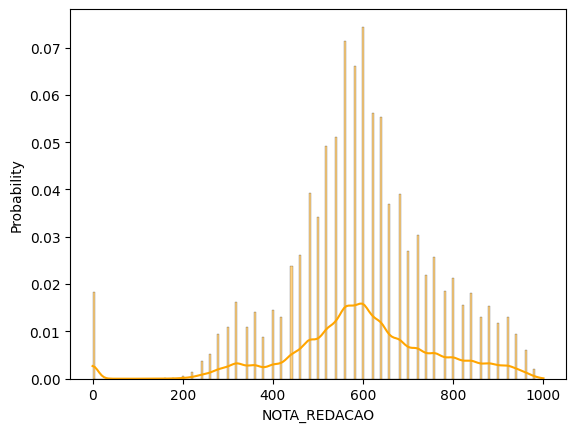

In [50]:
sns.histplot(enem_sp, x='NOTA_REDACAO', kde=True, color='orange', stat='probability', bins=32)

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

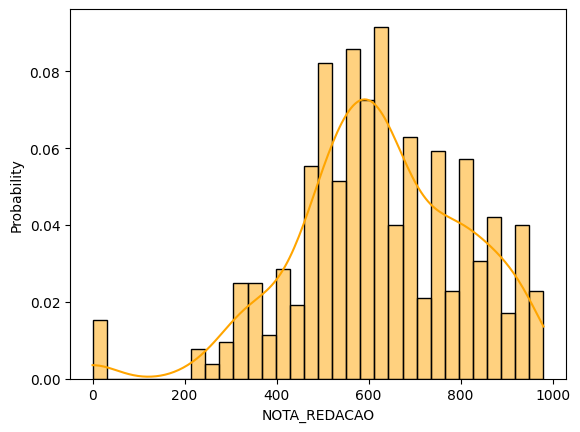

In [55]:
sns.histplot(enem_tupa, x='NOTA_REDACAO', kde=True, color='orange', stat='probability',bins=32)

QQPLOT

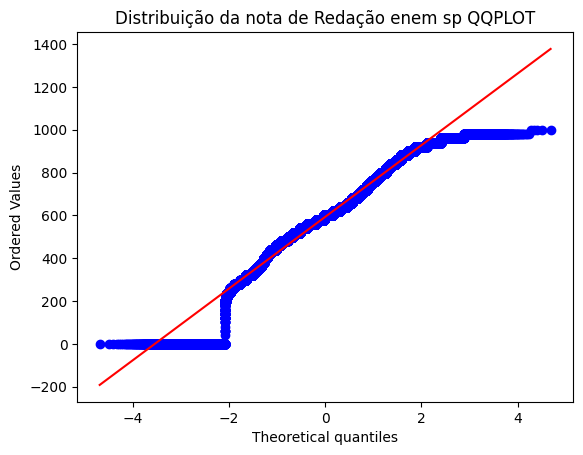

In [61]:
stats.probplot(enem_sp['NOTA_REDACAO'], plot=plt, dist='norm')
plt.title('Distribuição da nota de Redação enem sp QQPLOT')
plt.show()

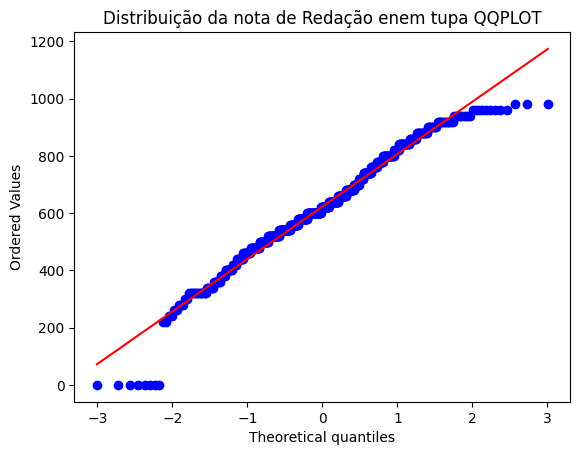

In [62]:
stats.probplot(enem_tupa['NOTA_REDACAO'], plot=plt, dist='norm')
plt.title('Distribuição da nota de Redação enem tupa QQPLOT')
plt.show()

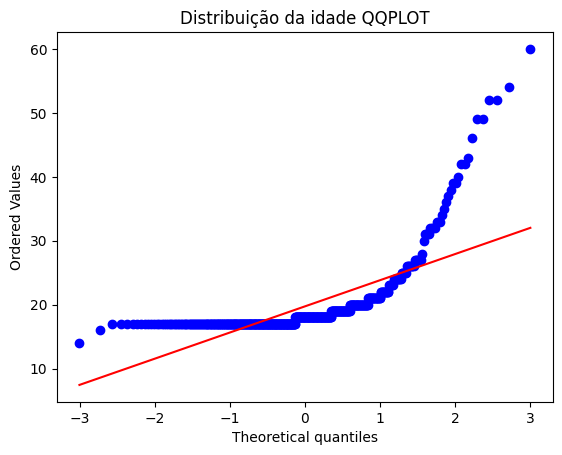

In [63]:
stats.probplot(enem_tupa['IDADE'], plot=plt, dist='norm')
plt.title('Distribuição da idade QQPLOT')
plt.show()